In [3]:
#Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

#Load in the data - May want to add try/catch block
data = np.loadtxt('../data/data_for_testing_00.dat',)
#Load Columns
day = data[:,0]
energy = data[:,1]
riseTime = data[:,2]

Attempt to create a more accurate gaussian fit

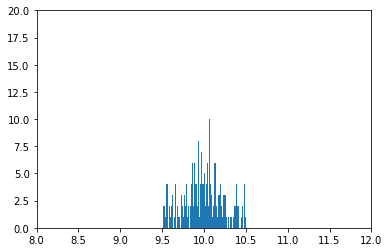

In [5]:
#Atempt to isolate the peak. Place all other data to a constant
start = 9.5
end = 10.5

peak = np.array([])
for i in energy:
    if(i>start and i<end):
        peak = np.append(peak, [i])
    else:
        peak = np.append(peak, 1)

plt.hist(peak, bins=int(max(day)))
plt.xlim((8, 12))
plt.ylim((0, 20))
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

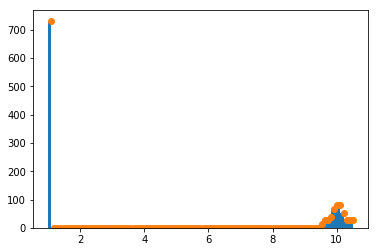

In [6]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

y, x, _ = plt.hist(peak,bins=100)

x = x[1:] 

n = len(peak)                     #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

plt.plot(x, y, 'o')

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Energy')
plt.xlim((8, 12))
plt.ylim((0, 20))
plt.ylabel('Count')
plt.show()